### 1. 하이퍼파라미터 설정/ Wandb 초기화


In [30]:
# ============================================
# 🔥 하이퍼파라미터 설정 (여기만 수정하세요!)
# ============================================

MODEL_NAME = 'efficientnet_b0'
BATCH_SIZE = 32
N_FOLDS = 2
EPOCHS = 1
LR = 0.001
PATIENCE=5
IMAGE_SIZE=224

print("=" * 60)
print("📋 하이퍼파라미터 설정")
print("=" * 60)
print(f"모델: {MODEL_NAME}")
print(f"배치 크기: {BATCH_SIZE}")
print(f"K-Fold: {N_FOLDS}")
print(f"Epochs: {EPOCHS}")
print(f"Learning Rate: {LR}")
print(f"Patience: {PATIENCE}")
print(f"Image Size: {IMAGE_SIZE}")

print("=" * 60)

📋 하이퍼파라미터 설정
모델: efficientnet_b0
배치 크기: 32
K-Fold: 2
Epochs: 1
Learning Rate: 0.001
Patience: 5
Image Size: 224


In [4]:
import wandb
import os
from datetime import datetime

# Wandb 로그인 (이미 로컬에 로그인되어 있다면 주석 처리)
# wandb.login()  # 로컬 환경에서 이미 로그인되어 있으면 불필요, 로그인 필요시 wandb login 터미널 명령어 사용

# 🔥 모델 선택 (여기를 수정하여 다른 모델 실험 가능)
# 사용 가능한 모델:
# - EfficientNet: 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3'
# - ResNet: 'resnet18', 'resnet34', 'resnet50', 'resnet101'
# - ViT: 'vit_tiny_patch16_224', 'vit_small_patch16_224'
# - ConvNeXt: 'convnext_tiny', 'convnext_small'
# - MobileNet: 'mobilenetv3_small_100', 'mobilenetv3_large_100'
SELECTED_MODEL = MODEL_NAME  # 🔥 여기를 변경하여 다른 모델 실험!

# 모델별 설정
MODEL_CONFIGS = {
    'efficientnet_b0': {'display_name': 'EfficientNet-B0', 'short_name': 'effnet-b0'},
    'efficientnet_b1': {'display_name': 'EfficientNet-B1', 'short_name': 'effnet-b1'},
    'efficientnet_b2': {'display_name': 'EfficientNet-B2', 'short_name': 'effnet-b2'},
    'efficientnet_b3': {'display_name': 'EfficientNet-B3', 'short_name': 'effnet-b3'},
    'resnet18': {'display_name': 'ResNet-18', 'short_name': 'resnet18'},
    'resnet34': {'display_name': 'ResNet-34', 'short_name': 'resnet34'},
    'resnet50': {'display_name': 'ResNet-50', 'short_name': 'resnet50'},
    'resnet101': {'display_name': 'ResNet-101', 'short_name': 'resnet101'},
    'vit_tiny_patch16_224': {'display_name': 'ViT-Tiny', 'short_name': 'vit-tiny'},
    'vit_small_patch16_224': {'display_name': 'ViT-Small', 'short_name': 'vit-small'},
    'convnext_tiny': {'display_name': 'ConvNeXt-Tiny', 'short_name': 'convnext-tiny'},
    'convnext_small': {'display_name': 'ConvNeXt-Small', 'short_name': 'convnext-small'},
    'mobilenetv3_small_100': {'display_name': 'MobileNetV3-Small', 'short_name': 'mobilenet-small'},
    'mobilenetv3_large_100': {'display_name': 'MobileNetV3-Large', 'short_name': 'mobilenet-large'},
}

model_config = MODEL_CONFIGS.get(SELECTED_MODEL, {'display_name': SELECTED_MODEL, 'short_name': SELECTED_MODEL})
MODEL_NAME = model_config['short_name']
MODEL_DISPLAY_NAME = model_config['display_name']

print(f"🎯 선택된 모델: {MODEL_DISPLAY_NAME} ({SELECTED_MODEL})")

# 🔥 자동 넘버링 함수
def get_next_run_number(project_name, model_name):
    """
    기존 실험들의 넘버링을 확인하여 다음 번호를 반환
    """
    try:
        api = wandb.Api()
        runs = api.runs(f"{api.default_entity}/{project_name}")
        
        # 모델명으로 시작하는 run들의 번호 추출
        existing_numbers = []
        for run in runs:
            if run.name.startswith(model_name):
                # 이름에서 숫자 부분 추출 (예: efficientnet-b0_003 -> 3)
                parts = run.name.split('_')
                if len(parts) > 1 and parts[-1].isdigit():
                    existing_numbers.append(int(parts[-1]))
        
        # 다음 번호 반환
        next_number = max(existing_numbers) + 1 if existing_numbers else 1
        return next_number
    except:
        # API 접근 실패 시 타임스탬프 기반 번호 반환
        return int(datetime.now().strftime("%H%M%S")) % 1000

# 프로젝트 설정
PROJECT_NAME = "cifar10-classification-practice"

config = {
    "model": MODEL_DISPLAY_NAME,
    "model_architecture": SELECTED_MODEL,
    "dataset": "CIFAR-10",
    "epochs": 10,
    "batch_size": 128,
    "learning_rate": 0.001,
    "n_splits": 2,
    "early_stopping_patience": 5,
    "optimizer": "Adam",
    "image_size": 128,
    "data_subset_ratio": 0.1,
}

# 🔥 자동 넘버링된 실험명 생성
run_number = get_next_run_number(PROJECT_NAME, MODEL_NAME)
experiment_name = f"{MODEL_NAME}_{run_number:03d}"  # 3자리 숫자로 패딩 (예: 001, 002, ...)

print(f"🚀 실험명: {experiment_name}")

# 실험 시작
run = wandb.init(
    project=PROJECT_NAME,
    config=config,
    name=experiment_name,
    tags=[MODEL_NAME, "k-fold", "transfer-learning", "practice"]
)

print(f"✅ Wandb 초기화 완료! Run ID: {run.id}")
print(f"📊 대시보드 링크: {run.url}")


/opt/anaconda3/envs/CV_competition/lib/python3.10/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/opt/anaconda3/envs/CV_competition/lib/python3.10/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened bec

🎯 선택된 모델: EfficientNet-B0 (efficientnet_b0)
🚀 실험명: effnet-b0_010


wandb: ERROR Failed to detect the name of this notebook. You can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: aboutexo04 (aboutexo04-korea-open-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


✅ Wandb 초기화 완료! Run ID: o8hdvv9e
📊 대시보드 링크: https://wandb.ai/aboutexo04-korea-open-university/cifar10-classification-practice/runs/o8hdvv9e


### 2. 라이브러리 임포트/ MPS 설정

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, Subset
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import timm
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns
import copy

# 디바이스 설정
# 🔥 ConvNeXt와 일부 모델은 MPS에서 view() 문제가 있어 CPU 사용
PROBLEMATIC_MODELS = ['convnext_tiny', 'convnext_small', 'convnext_base']

if SELECTED_MODEL in PROBLEMATIC_MODELS:
    device = torch.device("cpu")
    print(f'Using device: CPU (MPS has compatibility issues with {SELECTED_MODEL})')
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print(f'Using device: MPS (Apple Silicon)')
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'Using device: CUDA')
else:
    device = torch.device("cpu")
    print(f'Using device: CPU')

Using device: MPS (Apple Silicon)


### 3. 데이터셋

In [6]:
# ============================================
# CIFAR10 데이터 직접 로딩 (pickle 파일에서)
# ============================================
import pickle
from pathlib import Path

class CIFAR10Dataset(Dataset):
    """
    CIFAR10 데이터셋을 pickle 파일에서 직접 로드
    
    Args:
        data_dir: CIFAR10 데이터가 있는 디렉토리 (cifar-10-batches-py 폴더)
        train: True면 train 데이터, False면 test 데이터
        transform: Albumentations transform
        indices: 사용할 인덱스 리스트 (서브샘플링용, None이면 전체)
    """
    def __init__(self, data_dir, train=True, transform=None, indices=None):
        self.data_dir = Path(data_dir)
        self.train = train
        self.transform = transform
        
        # CIFAR10 데이터 로드
        self.data = []
        self.labels = []
        
        if train:
            # Train 데이터: data_batch_1 ~ data_batch_5
            for i in range(1, 6):
                batch_path = self.data_dir / f'data_batch_{i}'
                with open(batch_path, 'rb') as f:
                    batch = pickle.load(f, encoding='bytes')
                    # CIFAR10은 항상 bytes 키를 사용
                    labels = batch.get(b'labels', batch.get('labels', []))
                    batch_data = batch.get(b'data', batch.get('data', None))
                    if batch_data is not None:
                        self.data.append(batch_data)
                        self.labels.extend(labels)
                    else:
                        raise ValueError(f"CIFAR10 data_batch_{i} file is missing 'data' key")
            
            self.data = np.vstack(self.data)  # (50000, 3072)
        else:
            # Test 데이터: test_batch
            batch_path = self.data_dir / 'test_batch'
            with open(batch_path, 'rb') as f:
                batch = pickle.load(f, encoding='bytes')
                # CIFAR10은 항상 bytes 키를 사용
                # labels 처리
                labels = batch.get(b'labels', batch.get('labels', []))
                
                # data 처리
                batch_data = batch.get(b'data', batch.get('data', None))
                if batch_data is not None:
                    self.data = batch_data
                    self.labels = labels
                else:
                    raise ValueError(f"CIFAR10 test batch file is missing 'data' key")
        
        # 데이터 형태 변환 (3072 -> 32x32x3)
        self.data = self.data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)  # (N, 32, 32, 3)
        
        # 특정 인덱스만 사용
        if indices is not None:
            self.data = self.data[indices]
            self.labels = [self.labels[i] for i in indices]
            self.indices = indices
        else:
            self.indices = list(range(len(self.data)))
        
        self.labels = np.array(self.labels)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        # 이미지 가져오기 (이미 numpy array)
        image = self.data[idx]  # (32, 32, 3)
        
        # 레이블 가져오기
        label = int(self.labels[idx])
        
        # Transform 적용
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        
        return image, label


### 4.데이터로더

In [7]:
# ============================================
# CIFAR10 데이터 로딩 (pickle 파일에서 직접 로드)
# ============================================

from pathlib import Path
import pickle

print("="*60)
print("📦 Loading CIFAR10 Data (from pickle files)")
print("="*60)

# 데이터 경로 설정
data_dir = Path('../data/raw/cifar-10-batches-py')

# CIFAR10 데이터 직접 로드
print("✅ Loading CIFAR10 data from pickle files...")
train_data = CIFAR10Dataset(
    data_dir=str(data_dir),
    train=True,
    transform=None  # 나중에 transform 적용
)

test_data = CIFAR10Dataset(
    data_dir=str(data_dir),
    train=False,
    transform=None
)

# 클래스 이름 로드
meta_path = data_dir / 'batches.meta'
with open(meta_path, 'rb') as f:
    meta = pickle.load(f, encoding='bytes')
    if b'label_names' in meta:
        class_names = [name.decode('utf-8') for name in meta[b'label_names']]
    else:
        class_names = meta.get('label_names', [f'class_{i}' for i in range(10)])

num_classes = len(class_names)

print(f"\n✅ CIFAR10 Data Loaded!")
print(f"Train: {len(train_data):,} images")
print(f"Test:  {len(test_data):,} images")
print(f"Classes: {num_classes}")
print(f"Class names: {class_names}")
print(f"Location: {data_dir.absolute()}")

📦 Loading CIFAR10 Data (from pickle files)
✅ Loading CIFAR10 data from pickle files...

✅ CIFAR10 Data Loaded!
Train: 50,000 images
Test:  10,000 images
Classes: 10
Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Location: /Users/symun/CV_competition_practice/CV_competition_practice/../data/raw/cifar-10-batches-py


In [ ]:
import random

# 🔥 연습용 설정: 데이터셋 크기 조절 (10% 사용)
USE_SUBSET = True  # False로 변경하면 전체 데이터 사용
SUBSET_RATIO = 0.1  # 10%만 사용 (0.1 ~ 1.0)

# train_data와 test_data는 이미 CIFAR10Dataset으로 로드됨
# 레이블 추출 (K-Fold용)
train_labels = train_data.labels.tolist()

# 🔥 데이터셋 서브샘플링 (클래스별 균등 샘플링)
if USE_SUBSET:
    # Train 데이터 서브샘플링
    train_indices_by_class = {}
    for idx, label in enumerate(train_labels):
        if label not in train_indices_by_class:
            train_indices_by_class[label] = []
        train_indices_by_class[label].append(idx)
    
    # 각 클래스에서 균등하게 샘플링
    selected_train_indices = []
    for label, indices in train_indices_by_class.items():
        n_samples = int(len(indices) * SUBSET_RATIO)
        selected_train_indices.extend(random.sample(indices, n_samples))
    
    selected_train_indices.sort()
    train_dataset_raw = CIFAR10Dataset(
        data_dir=train_data.data_dir,
        train=True,
        transform=None,
        indices=selected_train_indices
    )
    train_labels = [train_labels[i] for i in selected_train_indices]
    
    # Test 데이터 서브샘플링
    test_labels = test_data.labels.tolist()
    test_indices_by_class = {}
    for idx, label in enumerate(test_labels):
        if label not in test_indices_by_class:
            test_indices_by_class[label] = []
        test_indices_by_class[label].append(idx)
    
    selected_test_indices = []
    for label, indices in test_indices_by_class.items():
        n_samples = int(len(indices) * SUBSET_RATIO)
        selected_test_indices.extend(random.sample(indices, n_samples))
    
    selected_test_indices.sort()
    test_dataset_raw = CIFAR10Dataset(
        data_dir=test_data.data_dir,
        train=False,
        transform=None,  # 나중에 K-Fold에서 적용
        indices=selected_test_indices
    )
    
    print(f"🔥 발열 감소 모드: 데이터셋 {int(SUBSET_RATIO*100)}% 사용")
else:
    train_dataset_raw = train_data
    test_dataset_raw = test_data

# Transform 적용된 test dataset
# USE_SUBSET일 때는 서브샘플링된 것 사용, 아니면 전체 사용
if USE_SUBSET:
    # 서브샘플링된 test_dataset_raw를 transform과 함께 다시 생성
    # test_dataset_raw가 이미 indices로 생성되어 있으므로, transform만 적용
    if 'val_transform' in globals() and val_transform is not None:
        test_dataset = CIFAR10Dataset(
            data_dir=test_data.data_dir,
            train=False,
            transform=val_transform,
            indices=selected_test_indices if USE_SUBSET else None
        )
    else:
        # val_transform이 없으면 나중에 적용할 수 있도록 저장
        test_dataset = test_dataset_raw  # transform은 None이지만 나중에 적용
else:
    # 전체 데이터 사용
    if 'val_transform' in globals() and val_transform is not None:
        test_dataset = CIFAR10Dataset(
            data_dir=test_data.data_dir,
            train=False,
            transform=val_transform
        )
    else:
        test_dataset = CIFAR10Dataset(
            data_dir=test_data.data_dir,
            train=False,
            transform=None
        )

if USE_SUBSET:
    print(f'✅ Total train size: {len(train_dataset_raw):,}')
    print(f'✅ Test size: {len(test_dataset_raw):,}')
else:
    print(f'✅ Total train size: {len(train_data):,}')
    print(f'✅ Test size: {len(test_dataset):,}')

if USE_SUBSET:
    print(f"\n💡 전체 데이터로 학습하려면 USE_SUBSET = False로 변경하세요")

🔥 발열 감소 모드: 데이터셋 10% 사용
✅ Total train size: 5,000
✅ Test size: 1,000

💡 전체 데이터로 학습하려면 USE_SUBSET = False로 변경하세요


### 4-1.Class Distribution 

In [18]:
# ============================================
# CIFAR10 클래스 분포 분석
# ============================================
from collections import Counter

# CIFAR10 클래스 이름 로드 (batches.meta에서 직접 로드)
# 항상 데이터에서 직접 로드하여 정확한 클래스명 사용
import pickle
meta_path = train_data.data_dir / 'batches.meta'
with open(meta_path, 'rb') as f:
    meta = pickle.load(f, encoding='bytes')
if b'label_names' in meta:
    class_names = [name.decode('utf-8') for name in meta[b'label_names']]
elif 'label_names' in meta:
    class_names = meta['label_names']
else:
    raise ValueError("Could not find label_names in batches.meta file")

# Train 클래스 카운트 (CIFAR10Dataset은 .labels 속성을 가지고 있음)
train_labels = train_data.labels.tolist()
train_counts = Counter(train_labels)

# Test 클래스 카운트
test_labels = test_data.labels.tolist()
test_counts = Counter(test_labels)

# 통계
print("=" * 60)
print("CIFAR10 Train Class Distribution")
print("=" * 60)
for i, name in enumerate(class_names):
    count = train_counts.get(i, 0)
    pct = count / len(train_data) * 100
    print(f"{i}. {name:20s}: {count:6,d} ({pct:5.2f}%)")

print(f"\nTotal train samples: {len(train_data):,}")

print("\n" + "=" * 60)
print("CIFAR10 Test Class Distribution")
print("=" * 60)
for i, name in enumerate(class_names):
    count = test_counts.get(i, 0)
    pct = count / len(test_data) * 100
    print(f"{i}. {name:20s}: {count:6,d} ({pct:5.2f}%)")

print(f"\nTotal test samples: {len(test_data):,}")

CIFAR10 Train Class Distribution
0. airplane            :  5,000 (10.00%)
1. automobile          :  5,000 (10.00%)
2. bird                :  5,000 (10.00%)
3. cat                 :  5,000 (10.00%)
4. deer                :  5,000 (10.00%)
5. dog                 :  5,000 (10.00%)
6. frog                :  5,000 (10.00%)
7. horse               :  5,000 (10.00%)
8. ship                :  5,000 (10.00%)
9. truck               :  5,000 (10.00%)

Total train samples: 50,000

CIFAR10 Test Class Distribution
0. airplane            :  1,000 (10.00%)
1. automobile          :  1,000 (10.00%)
2. bird                :  1,000 (10.00%)
3. cat                 :  1,000 (10.00%)
4. deer                :  1,000 (10.00%)
5. dog                 :  1,000 (10.00%)
6. frog                :  1,000 (10.00%)
7. horse               :  1,000 (10.00%)
8. ship                :  1,000 (10.00%)
9. truck               :  1,000 (10.00%)

Total test samples: 10,000


### 4-2.클래스 분포 시각화

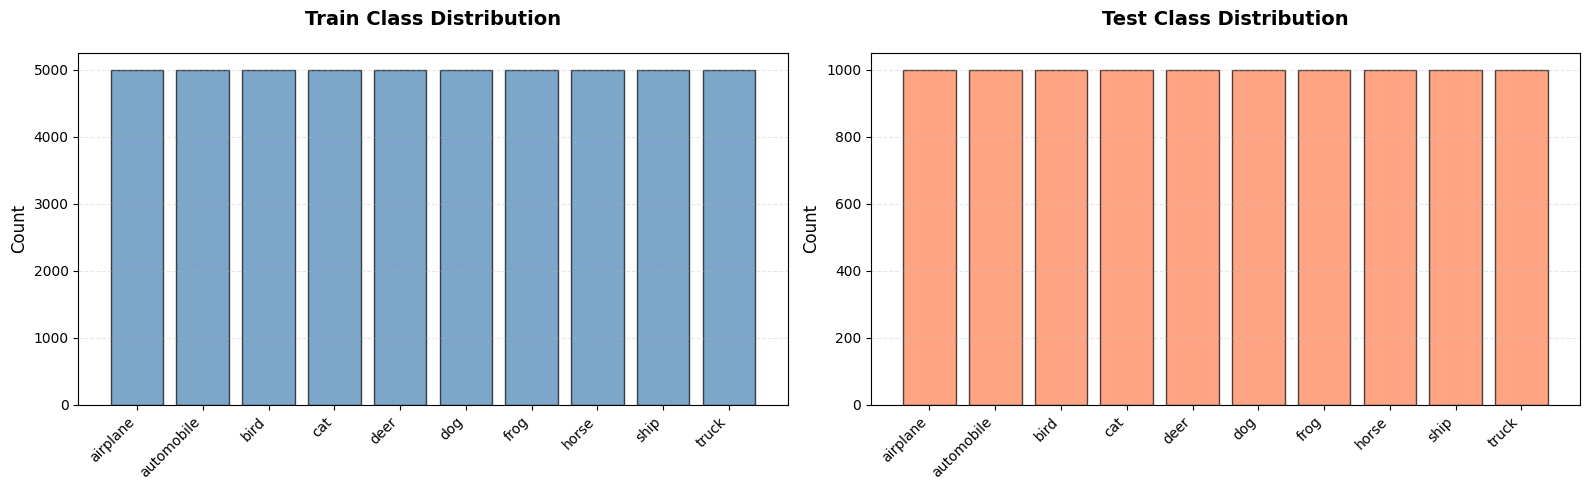


⚖️  Class Imbalance Ratio: 1.00
✅ Balanced dataset


In [21]:
# ============================================
# Cell 6: 클래스 분포 시각화
# ============================================

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Train 분포
axes[0].bar(range(len(class_names)), 
            [train_counts[i] for i in range(len(class_names))],
            color='steelblue',
            edgecolor='black',
            alpha=0.7)
axes[0].set_xticks(range(len(class_names)))
axes[0].set_xticklabels(class_names, rotation=45, ha='right')
axes[0].set_title('Train Class Distribution', 
                  fontsize=14, fontweight='bold', pad=20)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Test 분포
axes[1].bar(range(len(class_names)), 
            [test_counts[i] for i in range(len(class_names))],
            color='coral',
            edgecolor='black',
            alpha=0.7)
axes[1].set_xticks(range(len(class_names)))
axes[1].set_xticklabels(class_names, rotation=45, ha='right')
axes[1].set_title('Test Class Distribution', 
                  fontsize=14, fontweight='bold', pad=20)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()

# 출력 디렉토리 생성 (없으면 생성)
import os
output_dir = '../outputs'
os.makedirs(output_dir, exist_ok=True)

# 이미지 저장
plt.savefig(os.path.join(output_dir, 'class_distribution.png'), 
            dpi=300, bbox_inches='tight')
plt.show()

# 불균형 체크
max_count = max(train_counts.values())
min_count = min(train_counts.values())
imbalance_ratio = max_count / min_count

print(f"\n{'='*60}")
print(f"⚖️  Class Imbalance Ratio: {imbalance_ratio:.2f}")
if imbalance_ratio > 2.0:
    print("⚠️  Warning: Imbalanced dataset!")
    print("💡 Consider: Class weighting or resampling")
else:
    print("✅ Balanced dataset")
print(f"{'='*60}")

### 4-3. 샘플이미지

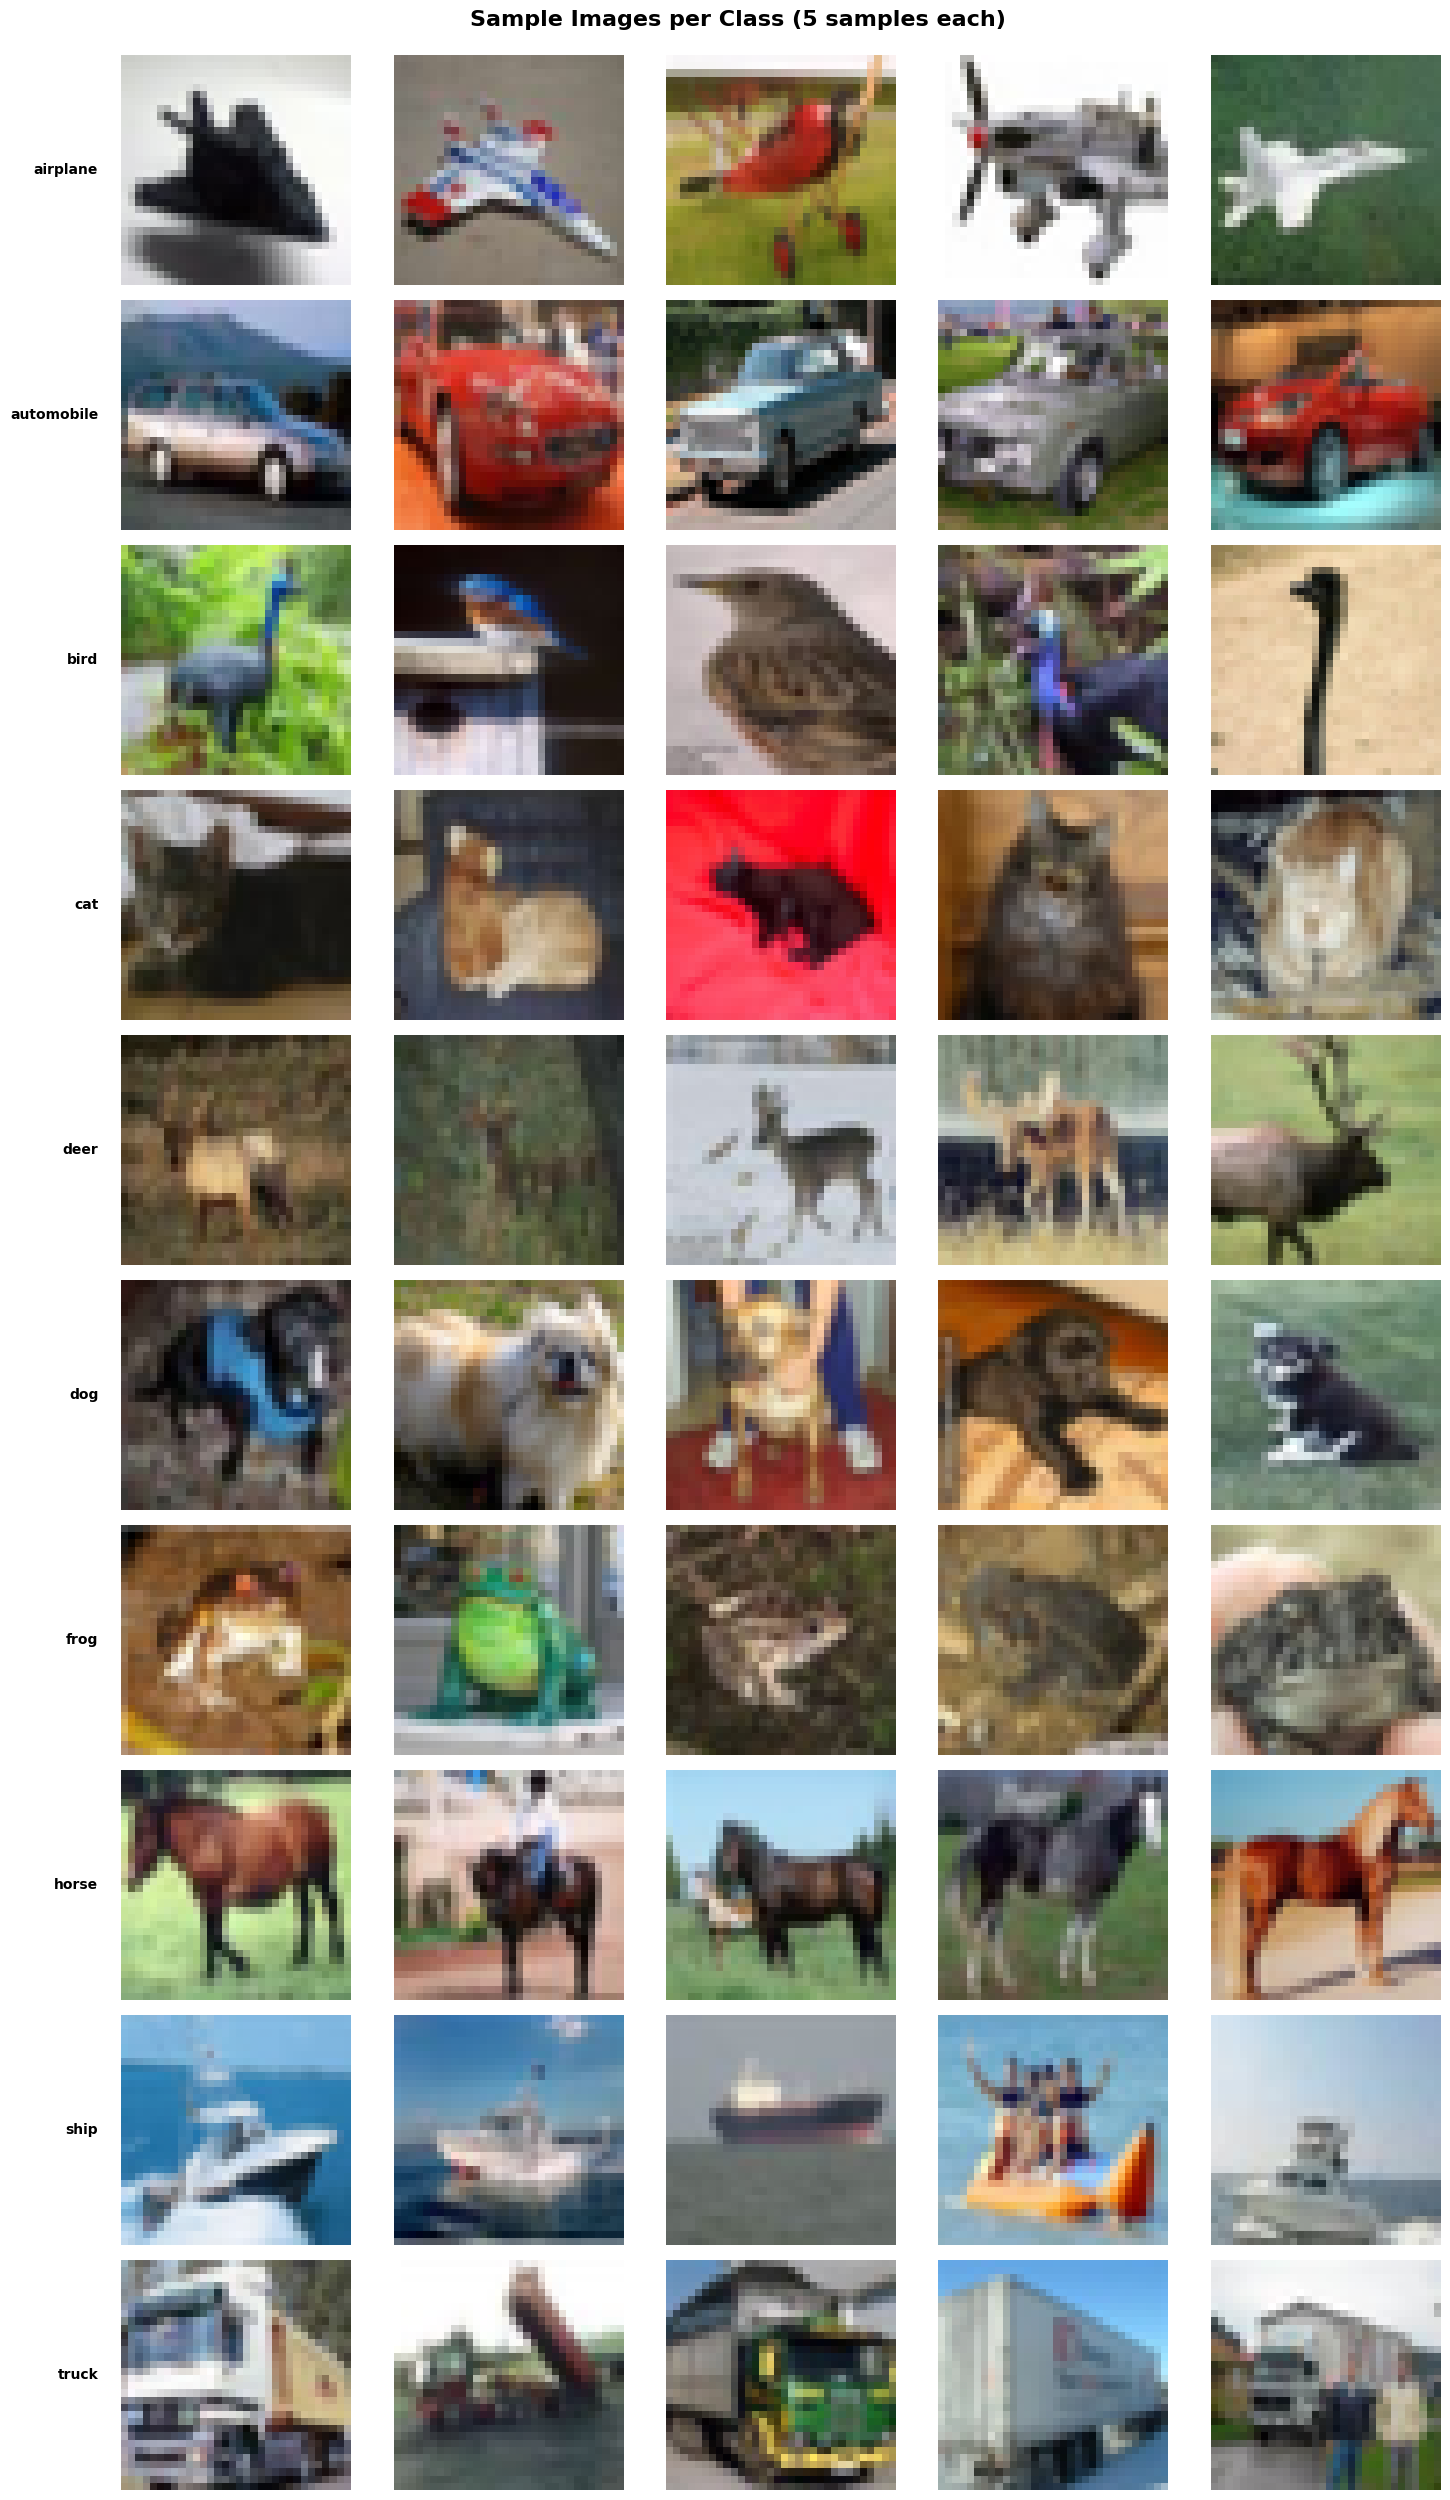

✅ Sample images saved!


In [22]:
# ============================================
# 클래스별 샘플 이미지
# ============================================

fig, axes = plt.subplots(10, 5, figsize=(15, 25))
fig.suptitle('Sample Images per Class (5 samples each)', 
             fontsize=16, fontweight='bold', y=0.998)

for class_idx in range(10):
    # 해당 클래스 이미지 찾기
    class_indices = [i for i, (_, label) in enumerate(train_data) 
                    if label == class_idx]
    
    # 5개 샘플
    for sample_idx in range(5):
        img, label = train_data[class_indices[sample_idx]]
        
        ax = axes[class_idx, sample_idx]
        ax.imshow(img)
        ax.axis('off')
        
        # 첫 번째 열에 클래스 이름
        if sample_idx == 0:
            ax.text(-0.1, 0.5, class_names[class_idx],
                   transform=ax.transAxes,
                   fontsize=10,
                   fontweight='bold',
                   va='center',
                   ha='right',
                   rotation=0)

plt.tight_layout()
plt.savefig('../outputs/sample_images.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("✅ Sample images saved!")

### 4-4. 이미지 크기 & 품질

In [24]:
# ============================================
# 이미지 크기 & 품질
# ============================================

# 샘플 100개 (CIFAR10Dataset은 numpy array 반환)
sample_images = [train_data[i][0] for i in range(100)]

# 크기 분석 (numpy array는 shape 속성 사용)
sizes = [img.shape for img in sample_images]
widths = [s[1] for s in sizes]  # (H, W, C) 형태이므로 height가 첫번째, width가 두번째
heights = [s[0] for s in sizes]

# 밝기 분석 (이미 numpy array이므로 변환 불필요)
brightnesses = []
contrasts = []

for img in sample_images:
    # CIFAR10Dataset은 이미 numpy array (32, 32, 3) 반환
    brightness = np.mean(img)
    contrast = np.std(img)
    
    brightnesses.append(brightness)
    contrasts.append(contrast)

# 출력
print(f"{'='*60}")
print("📏 Image Dimensions:")
print(f"{'='*60}")
print(f"Width:  {min(widths)} ~ {max(widths)} "
      f"(avg: {np.mean(widths):.1f})")
print(f"Height: {min(heights)} ~ {max(heights)} "
      f"(avg: {np.mean(heights):.1f})")

print(f"\n{'='*60}")
print("💡 Image Quality:")
print(f"{'='*60}")
print(f"Brightness: {np.mean(brightnesses):.1f} ± "
      f"{np.std(brightnesses):.1f}")
print(f"Contrast:   {np.mean(contrasts):.1f} ± "
      f"{np.std(contrasts):.1f}")
print(f"{'='*60}")

📏 Image Dimensions:
Width:  32 ~ 32 (avg: 32.0)
Height: 32 ~ 32 (avg: 32.0)

💡 Image Quality:
Brightness: 115.0 ± 28.3
Contrast:   52.9 ± 13.4


### 5. Early Stopping 클래스


In [25]:
class EarlyStopping:
    def __init__(self, patience=PATIENCE, verbose=True, delta=0):
        """
        Args:
            patience (int): validation F1이 개선되지 않아도 기다릴 epoch 수
            verbose (bool): 메시지 출력 여부
            delta (float): 개선으로 인정할 최소 변화량
        """
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.best_f1 = 0
        
    def __call__(self, val_f1, model):
        score = val_f1
        
        if self.best_score is None:
            self.best_score = score
            self.best_f1 = val_f1
            self.save_checkpoint(val_f1, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'⏸️  EarlyStopping counter: {self.counter}/{self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.best_f1 = val_f1
            self.save_checkpoint(val_f1, model)
            self.counter = 0
    
    def save_checkpoint(self, val_f1, model):
        '''validation F1이 개선되면 모델 저장'''
        if self.verbose:
            print(f'✅ Validation F1 improved ({self.best_f1:.4f} → {val_f1:.4f}). Saving model...')
        self.best_model_state = copy.deepcopy(model.state_dict())
        self.best_f1 = val_f1


# 🔥 MPS 호환성을 위한 모델 래퍼
class MPSCompatibleModel(nn.Module):
    """
    MPS에서 발생하는 view() 호환성 문제를 해결하는 래퍼
    """
    def __init__(self, base_model):
        super().__init__()
        self.base_model = base_model
    
    def forward(self, x):
        # 입력을 contiguous하게 만듦
        x = x.contiguous()
        output = self.base_model(x)
        # 출력도 contiguous하게 만듦
        return output.contiguous()
    
    def load_state_dict(self, state_dict, strict=True):
        return self.base_model.load_state_dict(state_dict, strict=strict)
    
    def state_dict(self):
        return self.base_model.state_dict()

### 6. Augmentation 설정


In [26]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

# ============================================
# Train Transform - 100% 작동 보장! ⭐⭐⭐⭐⭐
# ============================================
train_transform = A.Compose([
    # 필수: 리사이즈
    A.Resize(IMAGE_SIZE, IMAGE_SIZE),
    
    # 문서 특화 Augmentation
    A.Rotate(limit=5, p=0.3),  # 살짝 회전
    A.Perspective(scale=0.05, p=0.3),  # 각도 변화
    
    # 노이즈 추가 (스캔 효과)
    A.GaussNoise(p=0.2),
    
    # 흐림 효과 (압축/스캔 효과)
    A.Blur(blur_limit=3, p=0.2),
    
    # 밝기/대비 조정 (매우 중요!)
    A.RandomBrightnessContrast(
        brightness_limit=0.2,
        contrast_limit=0.2,
        p=0.5
    ),
    
    # 선택: 추가 Augmentation
    A.ShiftScaleRotate(
        shift_limit=0.05,
        scale_limit=0.05,
        rotate_limit=5,
        p=0.3
    ),
    
    # Normalize (필수!)
    A.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
    
    ToTensorV2()
])

# ============================================
# Validation Transform
# ============================================
val_transform = A.Compose([
    A.Resize(IMAGE_SIZE, IMAGE_SIZE),
    A.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
    ToTensorV2()
])


/opt/anaconda3/envs/CV_competition/lib/python3.10/site-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


### 7. 학습 및 검증 함수

아래 셀에서 `train_one_epoch`와 `validate` 함수를 정의합니다.

In [28]:
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    """
    한 에폭 동안 모델 학습
    
    Args:
        model: 학습할 모델
        train_loader: 학습 데이터 로더
        criterion: 손실 함수
        optimizer: 옵티마이저
        device: 디바이스 (CPU/GPU/MPS)
    
    Returns:
        train_loss: 평균 학습 손실
        train_acc: 학습 정확도 (%)
        train_f1: 학습 F1 Score
    """
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    
    for images, labels in tqdm(train_loader, desc="Training", leave=False):
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        # 통계
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
    
    train_loss = running_loss / total
    train_acc = 100. * correct / total
    train_f1 = f1_score(all_labels, all_preds, average='macro')
    
    return train_loss, train_acc, train_f1


def validate(model, val_loader, criterion, device):
    """
    검증 데이터셋에서 모델 평가
    
    Args:
        model: 평가할 모델
        val_loader: 검증 데이터 로더
        criterion: 손실 함수
        device: 디바이스 (CPU/GPU/MPS)
    
    Returns:
        val_loss: 평균 검증 손실
        val_acc: 검증 정확도 (%)
        val_f1: 검증 F1 Score (macro)
        all_preds: 모든 예측 결과
        all_labels: 모든 실제 레이블
    """
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validation", leave=False):
            images, labels = images.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # 통계
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    val_loss = running_loss / total
    val_acc = 100. * correct / total
    val_f1 = f1_score(all_labels, all_preds, average='macro')
    
    return val_loss, val_acc, val_f1, all_preds, all_labels

In [31]:
# 하이퍼파라미터 설정 (발열 감소를 위한 최적화)
NUM_EPOCHS = EPOCHS     # 🔥 데이터 10%로 줄였으니 에폭 증가 (2 → 10) =       # 64 → 128로 증가 (학습 속도 향상)
LEARNING_RATE = LR
N_SPLITS = N_FOLDS           # fold 수 3 → 2로 감소 (전체 학습 시간 단축)            # 🔥 에폭이 늘어나니 patience도 5로 복구

# K-Fold 설정
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

# 결과 저장
fold_models = []
fold_results = []

print("=" * 60)
print("K-Fold Cross Validation 시작 (연습용 최적화 버전)")
print(f"Epochs: {NUM_EPOCHS}, Batch Size: {BATCH_SIZE}, Folds: {N_SPLITS}")
print("=" * 60)

for fold, (train_idx, val_idx) in enumerate(skf.split(np.zeros(len(train_labels)), train_labels)):
    print(f"\n{'='*60}")
    print(f"Fold {fold + 1}/{N_SPLITS}")
    print(f"{'='*60}")
    
    # CIFAR10Dataset으로 직접 생성 (인덱스와 transform 적용)
    train_subset = CIFAR10Dataset(
        data_dir=train_data.data_dir,
        train=True,
        transform=train_transform,
        indices=train_idx.tolist() if isinstance(train_idx, np.ndarray) else train_idx
    )
    val_subset = CIFAR10Dataset(
        data_dir=train_data.data_dir,
        train=True,
        transform=val_transform,
        indices=val_idx.tolist() if isinstance(val_idx, np.ndarray) else val_idx
    )
    
    # DataLoader (num_workers=0 for notebook compatibility)
    train_loader = DataLoader(train_subset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
    val_loader = DataLoader(val_subset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
    
    # 모델 생성
    # 모델 생성 (SELECTED_MODEL 변수 사용)
    model = timm.create_model(SELECTED_MODEL, pretrained=True, num_classes=num_classes)
    model = model.to(device)
    
    # Loss & Optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2)
    
    # Early Stopping
    early_stopping = EarlyStopping(patience=PATIENCE, verbose=True)
    
    # 학습 이력
    history = {
        'train_loss': [], 'train_acc': [], 'train_f1': [],
        'val_loss': [], 'val_acc': [], 'val_f1': []
    }
    
    # Epoch 학습
    for epoch in range(NUM_EPOCHS):
        print(f"\nEpoch [{epoch+1}/{NUM_EPOCHS}]")
        
        # Train
        train_loss, train_acc, train_f1 = train_one_epoch(model, train_loader, criterion, optimizer, device)
        
        # Validation
        val_loss, val_acc, val_f1, _, _ = validate(model, val_loader, criterion, device)
        
        # 스케줄러 업데이트
        scheduler.step(val_f1)
        
        # 이력 저장
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['train_f1'].append(train_f1)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['val_f1'].append(val_f1)
        
        # 출력
        print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Train F1: {train_f1:.4f}")
        print(f"Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.2f}% | Val   F1: {val_f1:.4f}")
        
        # 🔥 Wandb 로깅
        wandb.log({
            f"fold_{fold+1}/train_loss": train_loss,
            f"fold_{fold+1}/train_acc": train_acc,
            f"fold_{fold+1}/train_f1": train_f1,
            f"fold_{fold+1}/val_loss": val_loss,
            f"fold_{fold+1}/val_acc": val_acc,
            f"fold_{fold+1}/val_f1": val_f1,
            f"fold_{fold+1}/learning_rate": optimizer.param_groups[0]['lr'],
            f"fold_{fold+1}/epoch": epoch + 1
        })
        
        # Early Stopping 체크
        early_stopping(val_f1, model)
        
        if early_stopping.early_stop:
            print("🛑 Early stopping triggered!")
            break
        
        # GPU 메모리 정리 (발열 감소)
        if device.type in ['cuda', 'mps']:
            torch.cuda.empty_cache() if device.type == 'cuda' else None
    
    # Best 모델 로드
    model.load_state_dict(early_stopping.best_model_state)
    
    # 모델 및 결과 저장
    fold_models.append(copy.deepcopy(model))
    fold_results.append({
        'fold': fold + 1,
        'best_val_f1': early_stopping.best_f1,
        'history': history
    })
    
    # 🔥 Fold 별 최고 성능 로깅
    wandb.log({
        f"fold_{fold+1}/best_val_f1": early_stopping.best_f1
    })
    
    print(f"\n✅ Fold {fold + 1} 완료! Best Validation F1: {early_stopping.best_f1:.4f}")
    
    # Fold 간 메모리 정리
    if device.type in ['cuda', 'mps']:
        torch.cuda.empty_cache() if device.type == 'cuda' else None

print("\n" + "=" * 60)
print("전체 K-Fold 학습 완료!")
print("=" * 60)

K-Fold Cross Validation 시작 (연습용 최적화 버전)
Epochs: 1, Batch Size: 32, Folds: 2

Fold 1/2

Epoch [1/1]


Train Loss: 0.7095 | Train Acc: 77.16% | Train F1: 0.7715
Val   Loss: 0.2928 | Val   Acc: 90.16% | Val   F1: 0.9009
✅ Validation F1 improved (0.9009 → 0.9009). Saving model...

✅ Fold 1 완료! Best Validation F1: 0.9009

Fold 2/2

Epoch [1/1]


Train Loss: 0.7228 | Train Acc: 76.91% | Train F1: 0.7690
Val   Loss: 0.3050 | Val   Acc: 89.70% | Val   F1: 0.8961
✅ Validation F1 improved (0.8961 → 0.8961). Saving model...

✅ Fold 2 완료! Best Validation F1: 0.8961

전체 K-Fold 학습 완료!


### 8. K-Fold Cross Validation 결과요약

In [32]:
# K-Fold 결과 요약
print("\n📊 K-Fold Cross Validation 결과 요약")
print("=" * 60)

for result in fold_results:
    fold = result['fold']
    best_f1 = result['best_val_f1']
    print(f"Fold {fold}: Best Validation F1 = {best_f1:.4f}")

# 평균 F1 Score
avg_f1 = np.mean([r['best_val_f1'] for r in fold_results])
std_f1 = np.std([r['best_val_f1'] for r in fold_results])

print("=" * 60)
print(f"평균 Validation F1: {avg_f1:.4f} ± {std_f1:.4f}")
print("=" * 60)

# 🔥 Wandb로 K-Fold 평균 결과 전송
wandb.log({
    "cv/avg_val_f1": avg_f1,
    "cv/std_val_f1": std_f1
})


📊 K-Fold Cross Validation 결과 요약
Fold 1: Best Validation F1 = 0.9009
Fold 2: Best Validation F1 = 0.8961
평균 Validation F1: 0.8985 ± 0.0024


### 9.앙상블 예측(소프트 보팅)

In [35]:
# Test Dataset 생성 (val_transform 적용 필수 - ToTensorV2()로 차원 변환)
# USE_SUBSET일 때는 서브샘플링된 인덱스 사용
if USE_SUBSET:
    # selected_test_indices가 이미 정의되어 있음
    final_test_dataset = CIFAR10Dataset(
        data_dir=test_data.data_dir,
        train=False,
        transform=val_transform,  # 필수: ToTensorV2() 포함되어 (H,W,C) -> (C,H,W) 변환
        indices=selected_test_indices
    )
else:
    final_test_dataset = CIFAR10Dataset(
        data_dir=test_data.data_dir,
        train=False,
        transform=val_transform  # 필수: ToTensorV2() 포함되어 (H,W,C) -> (C,H,W) 변환
    )

# Test DataLoader (num_workers=0 for notebook compatibility)
test_loader = DataLoader(final_test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

# 앙상블 예측 (소프트 보팅)
print("\n🔮 앙상블 예측 시작...")

all_predictions = []

for fold_idx, model in enumerate(fold_models):
    model.eval()
    fold_preds = []
    
    with torch.no_grad():
        for images, _ in tqdm(test_loader, desc=f"Fold {fold_idx + 1} 예측"):
            images = images.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)
            fold_preds.append(probs.cpu().numpy())
    
    fold_preds = np.concatenate(fold_preds, axis=0)
    all_predictions.append(fold_preds)

# 앙상블 (평균)
ensemble_probs = np.mean(all_predictions, axis=0)
ensemble_preds = np.argmax(ensemble_probs, axis=1)

print(f"✅ 앙상블 예측 완료! (총 {len(ensemble_preds)}개 샘플)")


🔮 앙상블 예측 시작...


Fold 2 예측: 100%|██████████| 32/32 [00:01<00:00, 25.87it/s]

✅ 앙상블 예측 완료! (총 1000개 샘플)


### 10. Test Set 최종 결과 (앙상블)

In [37]:
# Test set 실제 레이블
test_labels = [label for _, label in test_dataset_raw]

# Macro F1 Score 계산
test_f1 = f1_score(test_labels, ensemble_preds, average='macro')
test_acc = 100. * np.sum(np.array(ensemble_preds) == np.array(test_labels)) / len(test_labels)

print("\n" + "=" * 60)
print("🎯 Test Set 최종 결과 (앙상블)")
print("=" * 60)
print(f"Test Accuracy: {test_acc:.2f}%")
print(f"Test Macro F1 Score: {test_f1:.4f}")
print("=" * 60)

# 🔥 Wandb로 앙상블 테스트 결과 전송
wandb.log({
    "ensemble/test_accuracy": test_acc,
    "ensemble/test_f1_macro": test_f1,
    "ensemble/avg_val_f1": avg_f1,
    "ensemble/std_val_f1": std_f1
})


🎯 Test Set 최종 결과 (앙상블)
Test Accuracy: 90.90%
Test Macro F1 Score: 0.9068


### 11. 각 Fold별 학습 곡선 시각화

📊 학습 결과: 2개 Fold 발견
  - Fold 1: 1 epochs
    Train Loss: [0.709509437675476]
    Val Loss: [0.2927910887050629]
  - Fold 2: 1 epochs
    Train Loss: [0.7227947000789642]
    Val Loss: [0.30501356973409655]


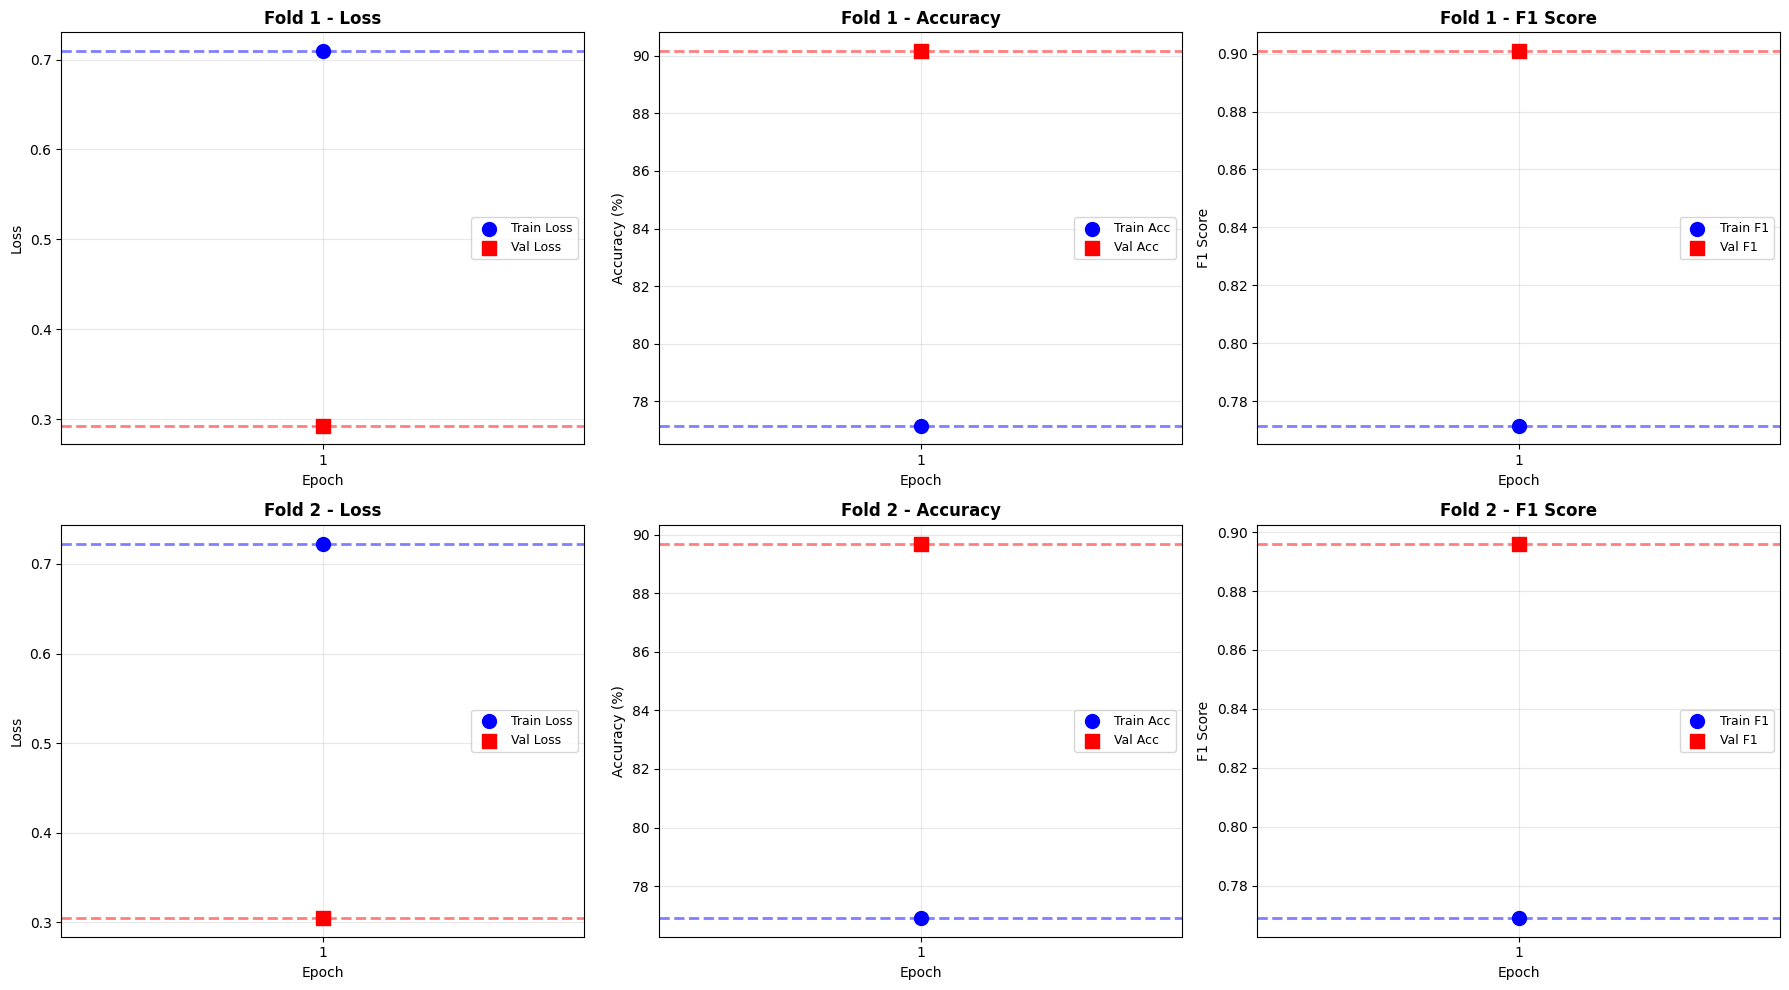

✅ 학습 곡선 시각화 완료!


In [44]:
# 각 Fold별 학습 곡선 시각화
# fold_results 확인
try:
    num_folds = len(fold_results)
    print(f"📊 학습 결과: {num_folds}개 Fold 발견")
except NameError:
    print("⚠️ fold_results가 정의되지 않았습니다. 학습 셀(Cell 24)을 먼저 실행해주세요.")
    num_folds = 0

if num_folds == 0:
    print("⚠️ 학습 결과가 없습니다. 학습을 먼저 실행해주세요.")
else:
    try:
        # 실제 fold 개수 사용
        fig, axes = plt.subplots(num_folds, 3, figsize=(18, 5 * num_folds))
        
        if num_folds == 1:
            axes = axes.reshape(1, -1)
        
        for fold_idx, result in enumerate(fold_results):
            history = result['history']
            fold = result['fold']
            
            epochs_list = list(range(1, len(history['train_loss']) + 1))
            num_epochs = len(epochs_list)
            print(f"  - Fold {fold}: {num_epochs} epochs")
            
            # 데이터 포인트 확인
            train_loss = history['train_loss']
            val_loss = history['val_loss']
            train_acc = history['train_acc']
            val_acc = history['val_acc']
            train_f1 = history['train_f1']
            val_f1 = history['val_f1']
            
            print(f"    Train Loss: {train_loss}")
            print(f"    Val Loss: {val_loss}")
            
            # Loss
            if num_epochs == 1:
                # Epoch가 1개일 때는 scatter plot으로 명확하게 표시
                axes[fold_idx, 0].scatter(epochs_list, train_loss, color='blue', s=100, label='Train Loss', marker='o', zorder=5)
                axes[fold_idx, 0].scatter(epochs_list, val_loss, color='red', s=100, label='Val Loss', marker='s', zorder=5)
                # 수평선 추가로 값 표시
                axes[fold_idx, 0].axhline(y=train_loss[0], color='blue', linestyle='--', alpha=0.5, linewidth=2)
                axes[fold_idx, 0].axhline(y=val_loss[0], color='red', linestyle='--', alpha=0.5, linewidth=2)
            else:
                axes[fold_idx, 0].plot(epochs_list, train_loss, 'b-', label='Train Loss', linewidth=3, marker='o', markersize=8, markeredgewidth=2)
                axes[fold_idx, 0].plot(epochs_list, val_loss, 'r-', label='Val Loss', linewidth=3, marker='s', markersize=8, markeredgewidth=2)
            axes[fold_idx, 0].set_title(f'Fold {fold} - Loss', fontsize=12, fontweight='bold')
            axes[fold_idx, 0].set_xlabel('Epoch', fontsize=10)
            axes[fold_idx, 0].set_ylabel('Loss', fontsize=10)
            axes[fold_idx, 0].legend(fontsize=9)
            axes[fold_idx, 0].grid(True, alpha=0.3)
            axes[fold_idx, 0].set_xticks(epochs_list)
            
            # Accuracy
            if num_epochs == 1:
                axes[fold_idx, 1].scatter(epochs_list, train_acc, color='blue', s=100, label='Train Acc', marker='o', zorder=5)
                axes[fold_idx, 1].scatter(epochs_list, val_acc, color='red', s=100, label='Val Acc', marker='s', zorder=5)
                axes[fold_idx, 1].axhline(y=train_acc[0], color='blue', linestyle='--', alpha=0.5, linewidth=2)
                axes[fold_idx, 1].axhline(y=val_acc[0], color='red', linestyle='--', alpha=0.5, linewidth=2)
            else:
                axes[fold_idx, 1].plot(epochs_list, train_acc, 'b-', label='Train Acc', linewidth=3, marker='o', markersize=8, markeredgewidth=2)
                axes[fold_idx, 1].plot(epochs_list, val_acc, 'r-', label='Val Acc', linewidth=3, marker='s', markersize=8, markeredgewidth=2)
            axes[fold_idx, 1].set_title(f'Fold {fold} - Accuracy', fontsize=12, fontweight='bold')
            axes[fold_idx, 1].set_xlabel('Epoch', fontsize=10)
            axes[fold_idx, 1].set_ylabel('Accuracy (%)', fontsize=10)
            axes[fold_idx, 1].legend(fontsize=9)
            axes[fold_idx, 1].grid(True, alpha=0.3)
            axes[fold_idx, 1].set_xticks(epochs_list)
            
            # F1 Score
            if num_epochs == 1:
                axes[fold_idx, 2].scatter(epochs_list, train_f1, color='blue', s=100, label='Train F1', marker='o', zorder=5)
                axes[fold_idx, 2].scatter(epochs_list, val_f1, color='red', s=100, label='Val F1', marker='s', zorder=5)
                axes[fold_idx, 2].axhline(y=train_f1[0], color='blue', linestyle='--', alpha=0.5, linewidth=2)
                axes[fold_idx, 2].axhline(y=val_f1[0], color='red', linestyle='--', alpha=0.5, linewidth=2)
            else:
                axes[fold_idx, 2].plot(epochs_list, train_f1, 'b-', label='Train F1', linewidth=3, marker='o', markersize=8, markeredgewidth=2)
                axes[fold_idx, 2].plot(epochs_list, val_f1, 'r-', label='Val F1', linewidth=3, marker='s', markersize=8, markeredgewidth=2)
            axes[fold_idx, 2].set_title(f'Fold {fold} - F1 Score', fontsize=12, fontweight='bold')
            axes[fold_idx, 2].set_xlabel('Epoch', fontsize=10)
            axes[fold_idx, 2].set_ylabel('F1 Score', fontsize=10)
            axes[fold_idx, 2].legend(fontsize=9)
            axes[fold_idx, 2].grid(True, alpha=0.3)
            axes[fold_idx, 2].set_xticks(epochs_list)
        
        plt.tight_layout()
        plt.show()
        print("✅ 학습 곡선 시각화 완료!")
    except Exception as e:
        print(f"❌ 에러 발생: {e}")
        import traceback
        traceback.print_exc()

### 12. 마크다운 파일에 실험 결과 자동 기록

In [45]:
# 🔥 마크다운 파일에 실험 결과 자동 기록
results_md_path = "experiment_results.md"

# 결과 데이터 구성
data_mode = f"{SUBSET_RATIO*100}% 데이터 (연습용)" if USE_SUBSET else "전체 데이터"
result_entry = {
    "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    "experiment_name": experiment_name,
    "model": MODEL_DISPLAY_NAME,
    "model_architecture": SELECTED_MODEL,
    "data_mode": data_mode,
    "fold_results": [{"fold": r["fold"], "val_f1": r["best_val_f1"]} for r in fold_results],
    "cv_avg_f1": avg_f1,
    "cv_std_f1": std_f1,
    "test_acc": test_acc,
    "test_f1": test_f1,
    "epochs": EPOCHS,
    "batch_size": BATCH_SIZE,
    "learning_rate": LR,
    "n_splits": N_FOLDS
}

# 기존 파일 확인 또는 생성
try:
    with open(results_md_path, "r", encoding="utf-8") as f:
        existing_content = f.read()
except FileNotFoundError:
    existing_content = f"""# 실험 결과 모음

이 파일은 모든 실험 결과를 자동으로 기록합니다.

## 실험 목록

"""
    with open(results_md_path, "w", encoding="utf-8") as f:
        f.write(existing_content)

# 결과 추가
with open(results_md_path, "a", encoding="utf-8") as f:
    f.write(f"### {result_entry['experiment_name']}\n\n")
    f.write(f"**실행 시간**: {result_entry['timestamp']}  \n")
    f.write(f"**데이터 모드**: {result_entry['data_mode']}  \n")
    f.write(f"**모델**: {result_entry['model']} ({result_entry['model_architecture']})  \n\n")
    f.write(f"**하이퍼파라미터**:  \n")
    f.write(f"- Image Size: {IMAGE_SIZE}  \n")
    f.write(f"- Epochs: {result_entry['epochs']}  \n")
    f.write(f"- Batch Size: {result_entry['batch_size']}  \n")
    f.write(f"- Learning Rate: {result_entry['learning_rate']}  \n")
    f.write(f"- K-Fold: {result_entry['n_splits']} folds  \n\n")
    f.write(f"**Validation Results**:  \n")
    for fold_result in result_entry['fold_results']:
        f.write(f"- Fold {fold_result['fold']}: Val F1 = {fold_result['val_f1']:.4f}  \n")
    f.write(f"- Average: {result_entry['cv_avg_f1']:.4f} ± {result_entry['cv_std_f1']:.4f}  \n\n")
    f.write(f"**Test Results**:  \n")
    f.write(f"- Accuracy: {result_entry['test_acc']:.2f}%  \n")
    f.write(f"- Macro F1: {result_entry['test_f1']:.4f}  \n\n")
    f.write("-----------------------------------------------------\n\n")

print(f"\n✅ 실험 결과가 {results_md_path}에 기록되었습니다!")



✅ 실험 결과가 experiment_results.md에 기록되었습니다!


### 13. 틀린그림찾기 분석 (오분류 분석)

📊 오분류 분석 결과
전체 테스트 샘플: 1,000개
정확히 예측: 909개 (90.90%)
오분류: 91개 (9.10%)


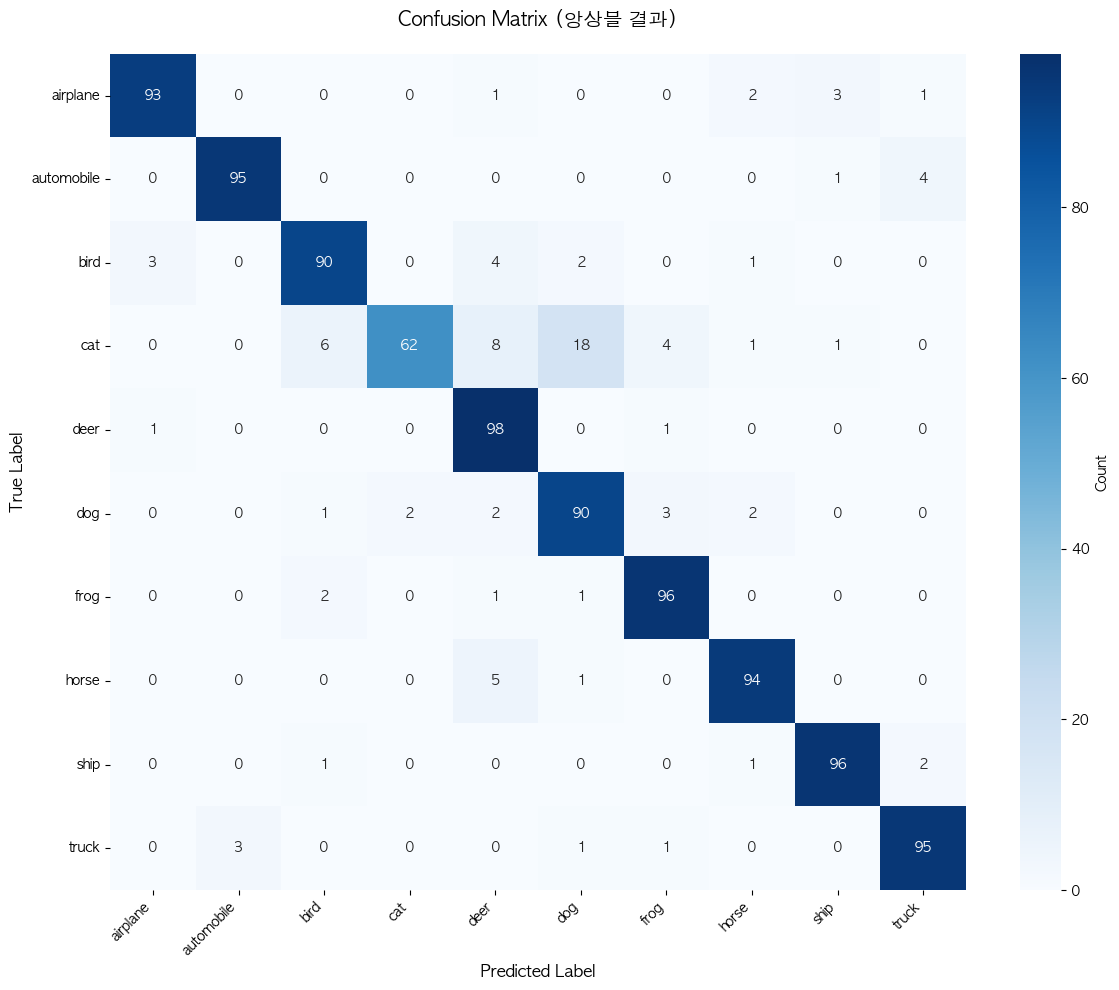

airplane            : 93.00% (93/100)
automobile          : 95.00% (95/100)
bird                : 90.00% (90/100)
cat                 : 62.00% (62/100)
deer                : 98.00% (98/100)
dog                 : 90.00% (90/100)
frog                : 96.00% (96/100)
horse               : 94.00% (94/100)
ship                : 96.00% (96/100)
truck               : 95.00% (95/100)


📈 가장 많이 틀린 클래스 조합 (Top 10):
------------------------------------------------------------
cat                  → dog                 :  18회
cat                  → deer                :   8회
cat                  → bird                :   6회
horse                → deer                :   5회
bird                 → deer                :   4회
automobile           → truck               :   4회
cat                  → frog                :   4회
airplane             → ship                :   3회
dog                  → frog                :   3회
truck                → automobile          :   3회


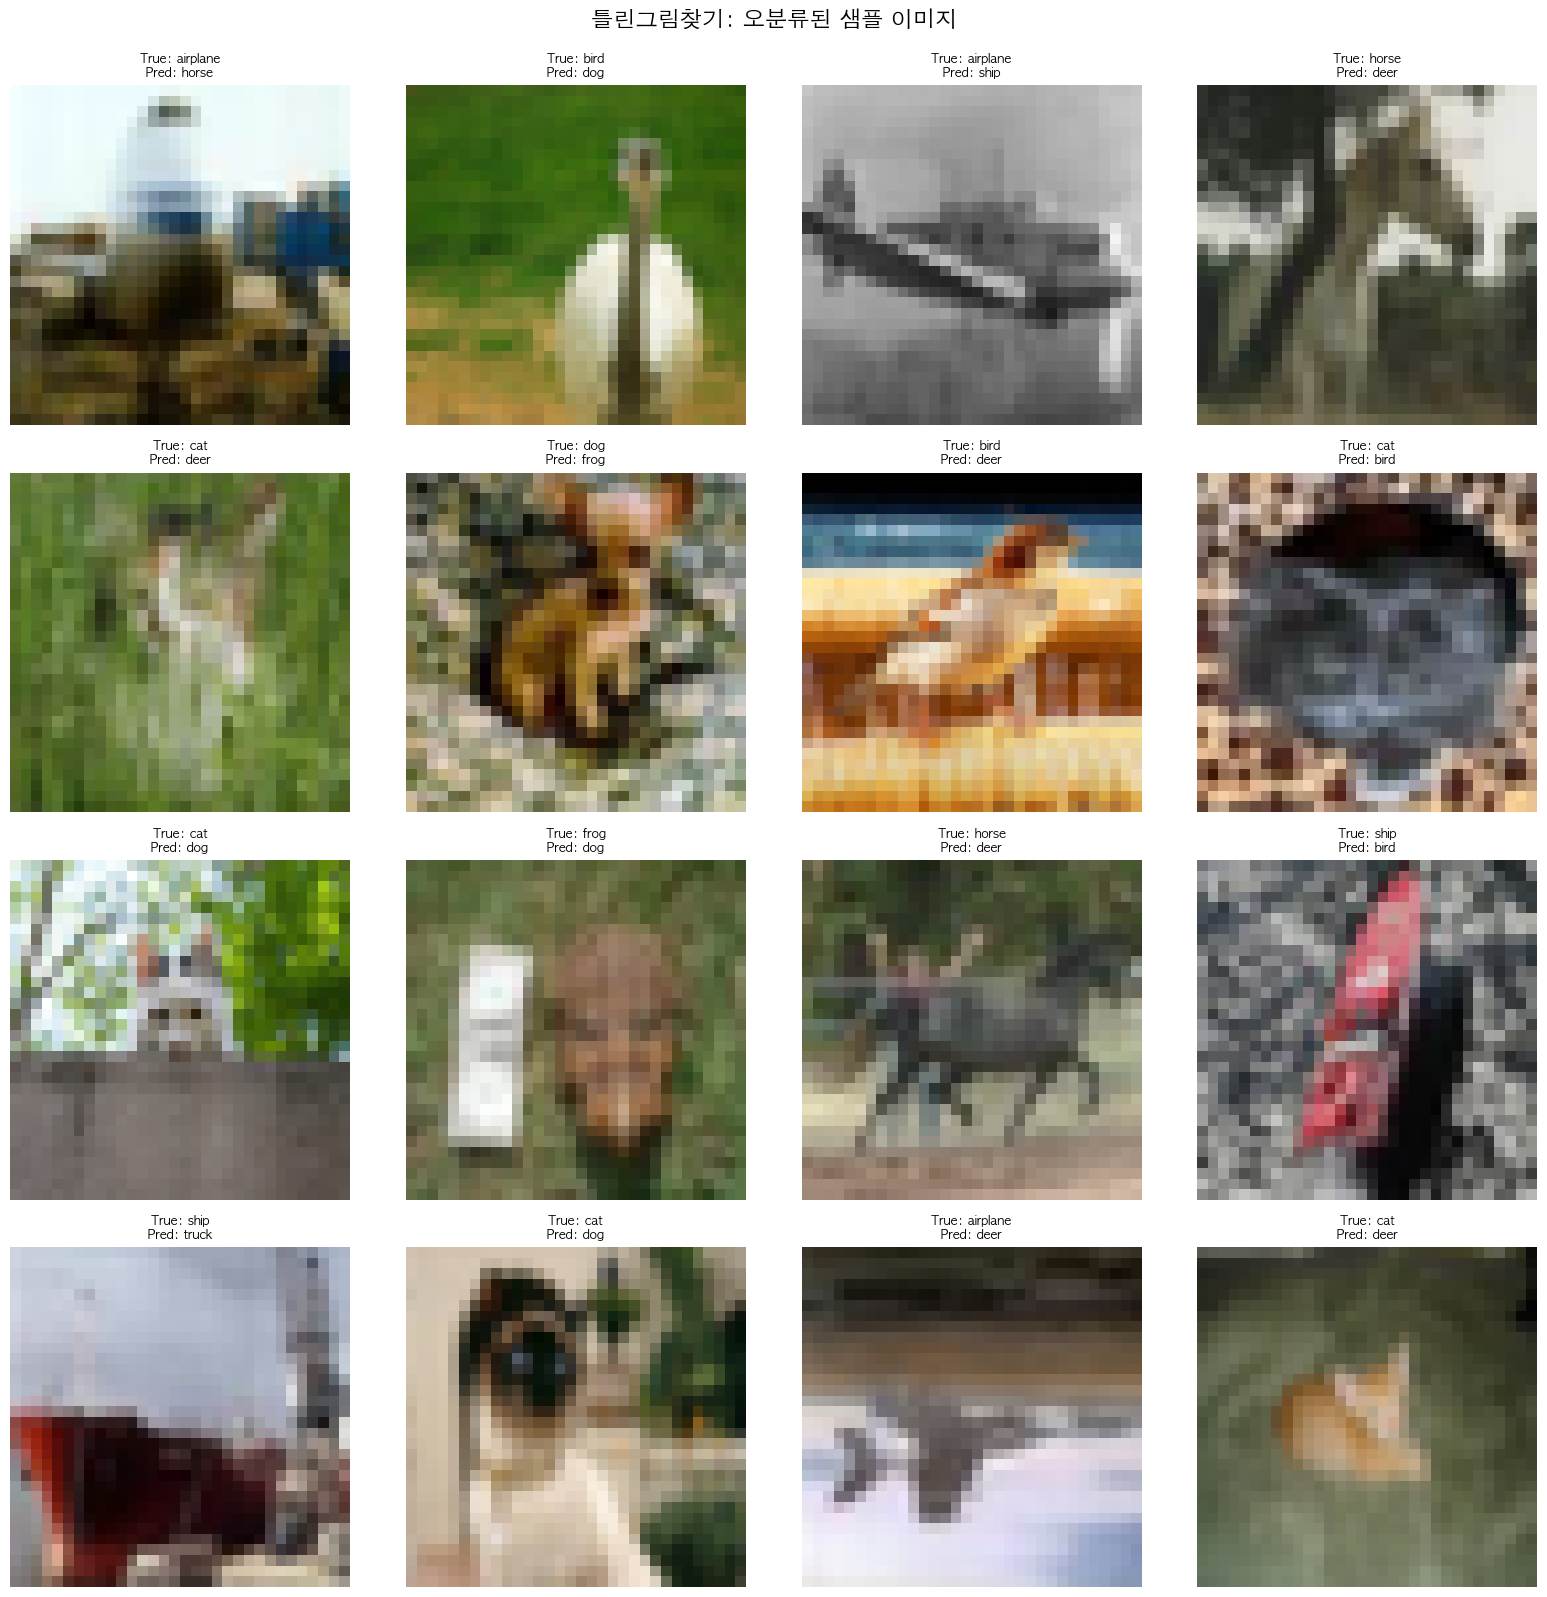


✅ 16개 오분류 샘플 이미지 시각화 완료!


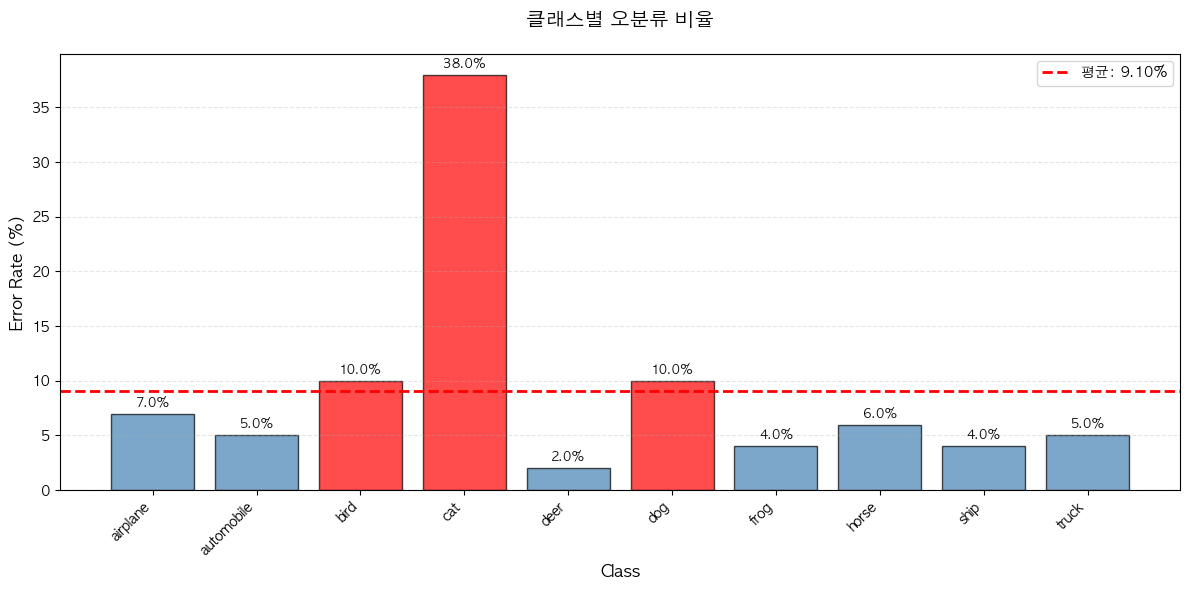


✅ 틀린그림찾기 분석 완료!


In [47]:
# ============================================
# 틀린그림찾기 분석: 오분류된 샘플 분석
# ============================================

# 한글 폰트 설정 (macOS)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# macOS에서 한글 폰트 설정
if platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
else:
    # 다른 OS에서도 한글 지원
    plt.rcParams['font.family'] = 'DejaVu Sans'
    plt.rcParams['axes.unicode_minus'] = False

from sklearn.metrics import confusion_matrix

# Test 레이블 가져오기
test_labels_array = np.array(test_labels)
ensemble_preds_array = np.array(ensemble_preds)

# 오분류된 샘플 찾기
wrong_predictions = test_labels_array != ensemble_preds_array
wrong_indices = np.where(wrong_predictions)[0]

print("=" * 60)
print("📊 오분류 분석 결과")
print("=" * 60)
print(f"전체 테스트 샘플: {len(test_labels_array):,}개")
print(f"정확히 예측: {np.sum(~wrong_predictions):,}개 ({100 * np.sum(~wrong_predictions) / len(test_labels_array):.2f}%)")
print(f"오분류: {len(wrong_indices):,}개 ({100 * len(wrong_indices) / len(test_labels_array):.2f}%)")
print("=" * 60)

# ============================================
# 1. Confusion Matrix 시각화
# ============================================
cm = confusion_matrix(test_labels_array, ensemble_preds_array)

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'}, ax=ax)
ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax.set_title('Confusion Matrix (앙상블 결과)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 클래스별 정확도 계산
class_accuracies = []
for i in range(len(class_names)):
    true_positives = cm[i, i]
    total = cm[i, :].sum()
    acc = (true_positives / total * 100) if total > 0 else 0
    class_accuracies.append(acc)
    print(f"{class_names[i]:20s}: {acc:5.2f}% ({true_positives}/{total})")

print("\n" + "=" * 60)

# ============================================
# 2. 오분류 패턴 분석
# ============================================
print("\n📈 가장 많이 틀린 클래스 조합 (Top 10):")
print("-" * 60)

# 오분류 패턴 카운트
misclassification_patterns = {}
for idx in wrong_indices:
    true_label = test_labels_array[idx]
    pred_label = ensemble_preds_array[idx]
    pattern = (true_label, pred_label)
    misclassification_patterns[pattern] = misclassification_patterns.get(pattern, 0) + 1

# 상위 10개 오분류 패턴
top_mistakes = sorted(misclassification_patterns.items(), key=lambda x: x[1], reverse=True)[:10]

for (true_idx, pred_idx), count in top_mistakes:
    print(f"{class_names[true_idx]:20s} → {class_names[pred_idx]:20s}: {count:3d}회")

# ============================================
# 3. 오분류된 샘플 이미지 시각화
# ============================================
if len(wrong_indices) > 0:
    # 최대 16개 샘플 시각화
    n_samples = min(16, len(wrong_indices))
    selected_wrong_indices = wrong_indices[:n_samples]
    
    fig, axes = plt.subplots(4, 4, figsize=(16, 16))
    fig.suptitle('틀린그림찾기: 오분류된 샘플 이미지', fontsize=16, fontweight='bold', y=0.995)
    
    for idx, wrong_idx in enumerate(selected_wrong_indices):
        row = idx // 4
        col = idx % 4
        
        # 원본 이미지 가져오기 (transform 없이)
        if USE_SUBSET:
            # selected_test_indices에서 실제 인덱스 매핑
            actual_idx = selected_test_indices[wrong_idx]
        else:
            actual_idx = wrong_idx
        
        # 원본 test_data에서 transform 없이 로드
        original_img, _ = CIFAR10Dataset(
            data_dir=test_data.data_dir,
            train=False,
            transform=None,
            indices=[actual_idx] if USE_SUBSET else None
        )[0]
        
        # numpy array로 변환 (이미 uint8이어야 함)
        if not isinstance(original_img, np.ndarray):
            original_img = np.array(original_img)
        if original_img.dtype != np.uint8:
            original_img = (original_img * 255).astype(np.uint8) if original_img.max() <= 1.0 else original_img.astype(np.uint8)
        
        true_label = test_labels_array[wrong_idx]
        pred_label = ensemble_preds_array[wrong_idx]
        
        ax = axes[row, col]
        ax.imshow(original_img.astype(np.uint8))
        ax.set_title(f'True: {class_names[true_label]}\nPred: {class_names[pred_label]}', 
                     fontsize=9, fontweight='bold')
        ax.axis('off')
    
    # 남은 subplot 숨기기
    for idx in range(n_samples, 16):
        row = idx // 4
        col = idx % 4
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()
    print(f"\n✅ {n_samples}개 오분류 샘플 이미지 시각화 완료!")
else:
    print("\n✅ 모든 샘플을 정확히 예측했습니다!")

# ============================================
# 4. 클래스별 오분류 비율 시각화
# ============================================
class_error_rates = []
for i in range(len(class_names)):
    errors = np.sum((test_labels_array == i) & (ensemble_preds_array != i))
    total = np.sum(test_labels_array == i)
    error_rate = (errors / total * 100) if total > 0 else 0
    class_error_rates.append(error_rate)

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['red' if rate > np.mean(class_error_rates) else 'steelblue' for rate in class_error_rates]
bars = ax.bar(range(len(class_names)), class_error_rates, color=colors, alpha=0.7, edgecolor='black')
ax.set_xlabel('Class', fontsize=12, fontweight='bold')
ax.set_ylabel('Error Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('클래스별 오분류 비율', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(range(len(class_names)))
ax.set_xticklabels(class_names, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3, linestyle='--')

# 평균선 추가
avg_error_rate = np.mean(class_error_rates)
ax.axhline(y=avg_error_rate, color='red', linestyle='--', linewidth=2, label=f'평균: {avg_error_rate:.2f}%')
ax.legend()

# 값 표시
for i, (bar, rate) in enumerate(zip(bars, class_error_rates)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{rate:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("✅ 틀린그림찾기 분석 완료!")
print("=" * 60)
